<h1> <center> Subgradients && Stochastic Subgradients Variantes </center> </h1> <br>

***Noutfi Fatima*** <br>
***Barrade Fatiha***  
<br>
***Supervised by :*** : <br> **Pr.ABDELLATIF EL AFIA**
    

In [1]:
import numpy as np
import pandas as pd
import random
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
def split_Data(X,Y):
    num_features=X.shape[1]
    data = np.column_stack((X, Y))  # Combine X and Y into a 2D array
    random.shuffle(data)
    
    split_ratio = 0.8
    split_index = int(len(data) * split_ratio)

    train_data = data[:split_index]
    test_data = data[split_index:]

    X_train, y_train = train_data[:, 0:num_features], train_data[:, num_features]
    X_test, y_test = test_data[:, 0:num_features], test_data[:, num_features]

    return X_train, y_train, X_test, y_test


In [3]:
def extend_input_space(x):
    """
    Extend the input space by adding a column of ones to the input data matrix.

    Parameters:
        X (numpy.ndarray): Input data matrix where each row is a data point.

    Returns:
        numpy.ndarray: Extended input data matrix with an additional column of ones.
    """
    ones_column = np.ones((len(x),1))
    if x.ndim == 1:
        # If X is 1D, convert it to a 2D array with an intercept column
        ones_column = np.ones((len(x),1))
        x=x.reshape(-1,1)
        extended_X = np.hstack((ones_column, x))
        
        return extended_X
    else :
        extended_X = np.hstack((ones_column, x))
             
        return extended_X

In [4]:
def generate_linearly_separable_data(num_samples=200, num_features=2, separation_margin=1):
    """
    Generate random linearly separable data.

    Parameters:
    - num_samples: Number of data points for each class.
    - num_features: Number of features.
    - separation_margin: Margin between classes (controls how well-separated they are).

    Returns:
    - X: Array of shape (2*num_samples, num_features) containing data points.
    - y: Array of shape (2*num_samples,) containing class labels (+1 or -1).
    """

    # Generate random weights for the separating hyperplane
    weights = np.random.rand(num_features)

    # Generate random data points for positive class
    X_positive = np.random.rand(num_samples, num_features) * separation_margin
    y_positive = np.ones(num_samples)  # Class labels for positive class

    # Generate random data points for negative class
    X_negative = np.random.rand(num_samples, num_features) * separation_margin
    y_negative = -np.ones(num_samples)  # Class labels for negative class

    # Apply the fixed bias term to make the data separable
    bias = -separation_margin / 2.0
    X_positive += bias
    X_negative -= bias

    # Combine positive and negative data
    X = np.vstack((X_positive, X_negative))
    y = np.hstack((y_positive, y_negative))

    # Shuffle the data to make it random
    indices = np.arange(2 * num_samples)
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]

    return X, y

In [5]:
X,y=generate_linearly_separable_data(num_samples=200, num_features=2, separation_margin=1)

In [6]:
def Plot_Sans_Separateur(X, Y,Nom):
    """
    Implement  for binary classification with visualization.

    Parameters:
        X (numpy.ndarray): Input data matrix where each row is a data point.
        Y (numpy.ndarray): True labels corresponding to each data point.
        w0 (numpy.ndarray): Initial weight vector.
        Tmax (int): Maximum number of iterations.

    Returns:
        tuple: A tuple containing the following:
            - numpy.ndarray: The final weight vector after the algorithm.
            - int: The misclassification rate (error rate) after the algorithm.
            - int: The total number of updates (iterations) performed.
    """
    extended_X = extend_input_space(X)  # Extend the input space


        # Plot the classifier and points for this iteration
    plt.figure(figsize=(8, 6))
    for i in range(len(extended_X)):
        if Y[i] == 1:
            plt.scatter(extended_X[i, 1], extended_X[i, 2], c="r")
        else:
            plt.scatter(extended_X[i, 1], extended_X[i, 2], c="g")

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend(loc='best')
    plt.title(Nom)
    plt.show()

In [7]:
def Plot_Avec_Separateur(w, X, Y, Nom):
    """
    Implement for binary classification with visualization.

    Parameters:
        X (numpy.ndarray): Input data matrix where each row is a data point.
        Y (numpy.ndarray): True labels corresponding to each data point.
        w (numpy.ndarray): Weight vector.
        Nom (str): Name of the plot.
    """
    extended_X = extend_input_space(X)  # Extend the input space

    # Plot the classifier and points for this iteration
    plt.figure(figsize=(8, 6))
    for i in range(len(extended_X)):
        if Y[i] == 1:
            plt.scatter(extended_X[i, 1], extended_X[i, 2], c="r")
        else:
            plt.scatter(extended_X[i, 1], extended_X[i, 2], c="g")

    # Plot the separator line based on the shape of w
    if len(w) == 3:
        x_line = np.linspace(X[:, 1].min(), X[:, 1].max(), 200)
        y_line = -(w[0] + w[1] * x_line) / w[2]
        plt.plot(x_line, y_line, 'b--', label='Separator')
    elif len(w) == 2:  # Assuming w includes bias
        x_line = np.linspace(X[:, 1].min(), X[:, 1].max(), 200)
        y_line = (-w[0] + w[1] * x_line)
        plt.plot(x_line, y_line, 'b--', label='Separator')
    else:
        print("Unsupported shape of weight vector w for plotting")

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend(loc='best')
    plt.title(Nom)
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


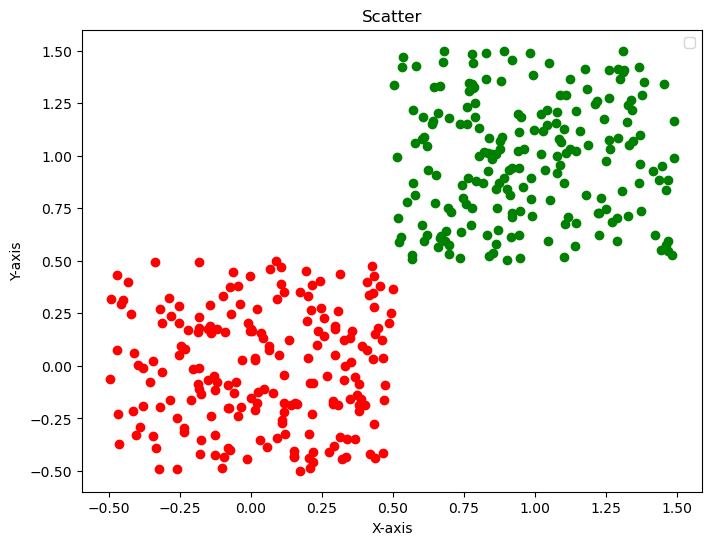

In [8]:
Plot_Sans_Separateur(X, y,"Scatter")

In [9]:
X_train, y_train, X_test, y_test=split_Data(X,y)

In [10]:
X_train.shape

(320, 2)

In [11]:
# L1 Loss function
import numpy as np

def l1_loss(Y, W, X):
    W = W.reshape(-1, 1)  # Reshape W to align with Y
    return np.mean(np.abs(Y - np.dot(X, W)))


# Subgradient of the L1 Loss
def subgradient_l1_loss(Y, W, X):
    diff = np.dot(X, W) - Y
    subgrad = np.where(diff < 0, -1, np.where(diff > 0, 1, np.random.uniform(-1, 1)))
    return subgrad

def Delta_rule_subgradient(W, X, Y, max_iterations=20000, gradient_threshold=0.001):
    extended_X = extend_input_space(X)
    n = len(extended_X)
    lr = 0.01  # learning rate for the gradient descent
    Error = []

    iteration = 0

    while iteration < max_iterations:
        gradient = subgradient_l1_loss(Y, W, extended_X)
        W = W - lr * np.mean(gradient[:, np.newaxis] * extended_X, axis=0)

        # Recalculate the loss
        Ls = l1_loss(Y, W, extended_X)
        Error.append(Ls)

        # Check if the gradient norm is below the threshold
        if np.linalg.norm(gradient) < gradient_threshold:
            break

        iteration += 1

    return W, Error ,iteration

In [12]:
W, Error ,iteration=Delta_rule_subgradient(np.array([1,1,1]),X_train, y_train, max_iterations=20000, gradient_threshold=0.001)

In [19]:
W

array([ 0.8319375 , -0.86221795, -0.8752723 ])

In [13]:
min(Error)

0.9905915299021112

In [14]:
0.9551628907190228

0.9551628907190228

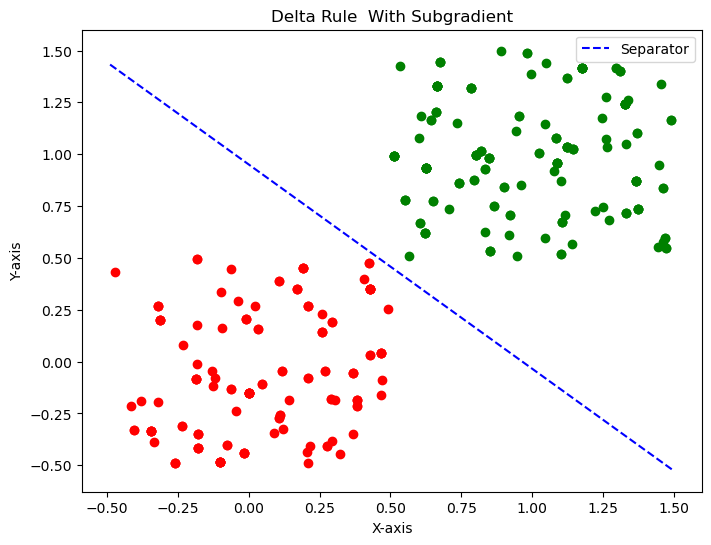

In [15]:
Plot_Avec_Separateur(W,X_train, y_train,'Delta Rule  With Subgradient')

In [16]:
def Projection(x, A, b):
    """
    Project the point x onto the feasible set defined by the constraint Ax <= b,
    where A is the constraint matrix and x is a vector of parameters.

    Parameters:
    - x: Input point to be projected
    - A: Constraint matrix
    - b: Constraint vector defining the upper bounds

    Returns:
    - Projected point onto the feasible set
    """
    # Define the objective function for minimization
    def objective(y):
        return np.linalg.norm(x - y)

    # Initial guess for y (can be any feasible point)
    y0 = np.zeros(x[0].shape)

    # Minimize the distance function subject to the constraint Ax <= b
    res = minimize(objective, np.array([0,0]), constraints={'type': 'ineq', 'fun': lambda y: b - np.dot(A, y)})

    return res.x


In [17]:
A = np.eye(X.shape[1])  
b = 5  



In [18]:
np.zeros(X_train[0].shape)

array([0., 0.])

In [20]:
Projection(X_train, A, b)

array([0.56177414, 0.5196108 ])

In [21]:
def Delta_rule_subgradient_projected(W, X, Y, A, b, max_iterations=30000, gradient_threshold=0.0001):
    extended_X = extend_input_space(X)
    lr = 0.01  # learning rate for the gradient descent
    Error = []
    iteration = 0

    while iteration < max_iterations:
        gradient = subgradient_l1_loss(Y, W, X)
        
        w=W - lr * np.mean(gradient[:, np.newaxis], axis=0)
        
        
        W = Projection(w, A, b)
        
        # Recalculate the loss
        Ls = l1_loss(Y, W, X)
        Error.append(Ls)

        # Check if the gradient norm is below the threshold
        if np.linalg.norm(gradient) < gradient_threshold:
            break

        iteration += 1

    return W, Error, iteration


In [22]:
W_final, Error, iterations = Delta_rule_subgradient_projected(np.array([1,1]), X_train, y_train, A, b)

In [23]:


# Print the results
print("Final optimized parameters:", W_final)
print("Final error:", min(Error))
print("Number of iterations:", iterations)



Final optimized parameters: [-0.38641636 -0.38655891]
Final error: 0.9620858646678043
Number of iterations: 30000


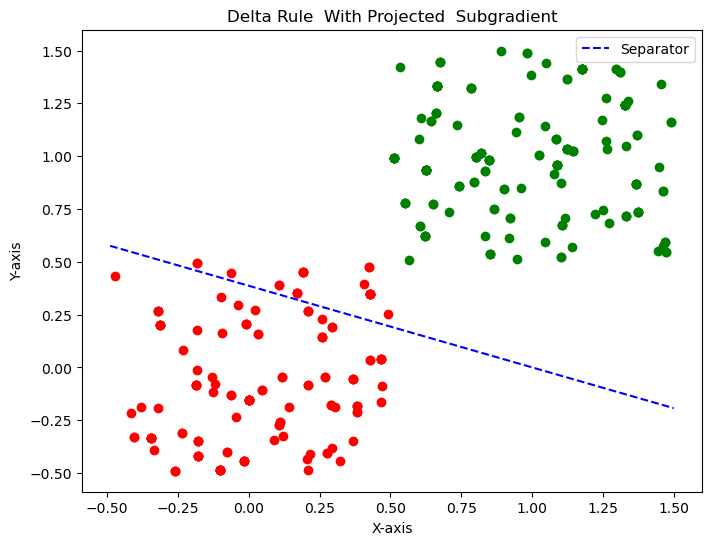

In [24]:
Plot_Avec_Separateur(W_final,X_train, y_train,'Delta Rule  With Projected  Subgradient')

In [41]:
def Proximal(x, num):
    """
    Proximal operator for L1 norm regularization.

    Parameters:
    - x: Input vector
    - num: Proximal parameter

    Returns:
    - Proximal of x
    """
    def pointwise_prox(u, t):
        if u >= t:
            return u - t
        elif u <= -t:
            return u + t
        else:
            return 0.0
    return np.vectorize(pointwise_prox)(x, num)

In [44]:
def Delta_rule_subgradient_proximal(W,lamdba ,X, Y, A, b, max_iterations=30000, gradient_threshold=0.01):
    extended_X = extend_input_space(X)
    lr = 0.01  # learning rate for the gradient descent
    Error = []
    iteration = 0

    while iteration < max_iterations:
        gradient = subgradient_l1_loss(Y, W, X)
        
        w=W - lr * np.mean(gradient[:, np.newaxis], axis=0)
        W = Proximal(w, lamdba)
        
        # Recalculate the loss
        Ls = l1_loss(Y, W, X)
        Error.append(Ls)

        # Check if the gradient norm is below the threshold
        if np.linalg.norm(gradient) < gradient_threshold:
            break

        iteration += 1

    return W, Error, iteration


In [48]:
W_final, Error, iterations =Delta_rule_subgradient_proximal(np.array([0,0]),0.0001, X_train, y_train, A, b, max_iterations=20000, gradient_threshold=0.0001)

[-0.0008375 -0.0008375]
[-0.001675 -0.001675]
[-0.0025125 -0.0025125]
[-0.00335 -0.00335]
[-0.0041875 -0.0041875]
[-0.005025 -0.005025]
[-0.0058625 -0.0058625]
[-0.0067 -0.0067]
[-0.0075375 -0.0075375]
[-0.008375 -0.008375]
[-0.0092125 -0.0092125]
[-0.01005 -0.01005]
[-0.0108875 -0.0108875]
[-0.011725 -0.011725]
[-0.0125625 -0.0125625]
[-0.0134 -0.0134]
[-0.0142375 -0.0142375]
[-0.015075 -0.015075]
[-0.0159125 -0.0159125]
[-0.01675 -0.01675]
[-0.0175875 -0.0175875]
[-0.018425 -0.018425]
[-0.0192625 -0.0192625]
[-0.0201 -0.0201]
[-0.0209375 -0.0209375]
[-0.021775 -0.021775]
[-0.0226125 -0.0226125]
[-0.02345 -0.02345]
[-0.0242875 -0.0242875]
[-0.025125 -0.025125]
[-0.0259625 -0.0259625]
[-0.0268 -0.0268]
[-0.0276375 -0.0276375]
[-0.028475 -0.028475]
[-0.0293125 -0.0293125]
[-0.03015 -0.03015]
[-0.0309875 -0.0309875]
[-0.031825 -0.031825]
[-0.0326625 -0.0326625]
[-0.0335 -0.0335]
[-0.0343375 -0.0343375]
[-0.035175 -0.035175]
[-0.0360125 -0.0360125]
[-0.03685 -0.03685]
[-0.0376875 -0.03768

In [49]:
W_final

array([-0.3864375, -0.3864375])

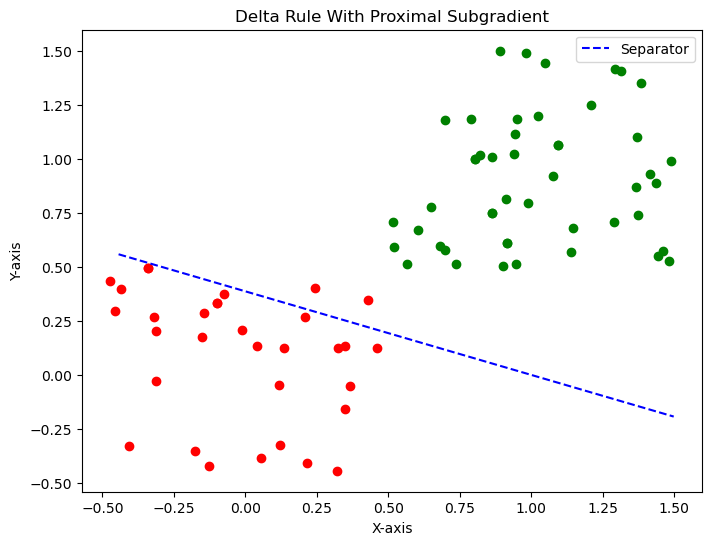

In [51]:
Plot_Avec_Separateur(W_final,X_test,y_test,'Delta Rule With Proximal Subgradient')

In [56]:
import numpy as np

def stochastic_subgradient_descent(W, X, Y, learning_rate, num_iterations):
    """
    Perform Stochastic Subgradient Descent to optimize a cost function.

    Parameters:
        W (numpy.ndarray): Initial weight vector.
        X (numpy.ndarray): Feature matrix.
        Y (numpy.ndarray): Target values.
        learning_rate (float): Learning rate for updates.
        num_iterations (int): Number of iterations.

    Returns:
        numpy.ndarray: Optimized weight vector.
        list: List of errors during optimization.
    """
    m = len(Y)  
    n = X.shape[1]  
    Error = []

    for _ in range(num_iterations):
        for i in range(m):
            random_index = np.random.randint(m)  # Choose a random data point
            x_i = X[random_index:random_index+1]
            y_i = Y[random_index:random_index+1]

            # Compute the subgradient for the chosen data point
            gradient = subgradient_l1_loss(y_i, W, x_i)
            W = W.astype(float) - learning_rate * gradient.astype(float)

        # Calculate the total loss after each iteration
        Ls = l1_loss(Y, W, X)
        Error.append(Ls)

    return W, Error


In [61]:
W, Error = stochastic_subgradient_descent(np.array([0,0]), X_train, y_train, 0.001,10000)

In [62]:
min(Error)

0.9620905771388635

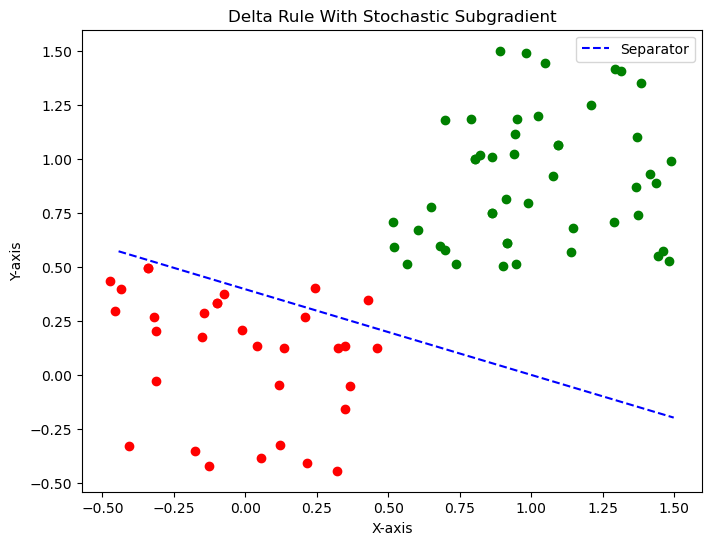

In [63]:
Plot_Avec_Separateur(W,X_test,y_test,'Delta Rule With Stochastic Subgradient')

In [71]:
def Delta_rule_stochastic_subgradient_projected(W, X, Y, A, b, max_iterations=10000, gradient_threshold=0.0001):
    
    lr = 0.01  # learning rate for the gradient descent
    Error = []
    m = len(Y)
    iteration = 0

    while iteration < max_iterations:
        for i in range(m):
            random_index = np.random.randint(m)  # Choose a random data point
            x_i = X[random_index:random_index+1]
            y_i = Y[random_index:random_index+1]

            # Compute the subgradient for the chosen data point
            gradient = subgradient_l1_loss(y_i, W, x_i)
        
            w = W.astype(float) - lr * np.mean(gradient[:, np.newaxis], axis=0).astype(float)
            
            W = Projection(w, A, b)
        
            # Recalculate the loss
            Ls = l1_loss(Y, W, X)
            Error.append(Ls)

            # Check if the gradient norm is below the threshold
            if np.linalg.norm(gradient) < gradient_threshold:
                break

            iteration += 1

    return W, Error, iteration


In [72]:
W, Error, iteration = Delta_rule_stochastic_subgradient_projected(np.array([1,1]), X_train, y_train, A, b)

In [74]:
W

array([-0.27103191, -0.27049837])

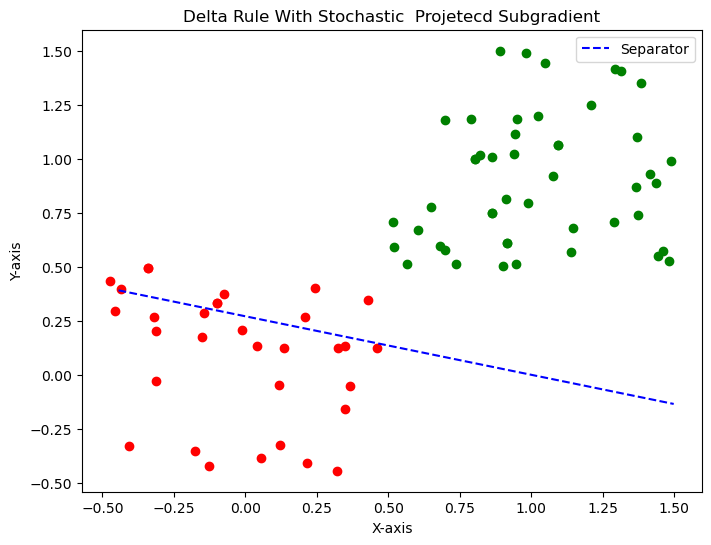

In [73]:
Plot_Avec_Separateur(W,X_test,y_test,'Delta Rule With Stochastic  Projetecd Subgradient')

In [86]:
def Delta_rule_stochastic_subgradient_proximal(W,lamdba ,X, Y, A, b, max_iterations=100, gradient_threshold=0.01):
    lr = 0.01  # learning rate for the gradient descent
    Error = []
    iteration = 0
    m = len(Y)

    while iteration < max_iterations:
        
        for i in range(m):
            random_index = np.random.randint(m)  # Choose a random data point
            x_i = X[random_index:random_index+1]
            y_i = Y[random_index:random_index+1]

            # Compute the subgradient for the chosen data point
            gradient = subgradient_l1_loss(y_i, W, x_i)
        
            w = W.astype(float) - lr * np.mean(gradient[:, np.newaxis], axis=0).astype(float)
            
            W = Proximal(w, lamdba)
        
        # Recalculate the loss
            Ls = l1_loss(Y, W, X)
            Error.append(Ls)

        # Check if the gradient norm is below the threshold
        if np.linalg.norm(gradient) < gradient_threshold:
            break

        iteration += 1

    return W, Error, iteration


In [87]:
W, Error, iteration=Delta_rule_stochastic_subgradient_proximal(np.array([0,0]),0.001 ,X_train, y_train, A, b)

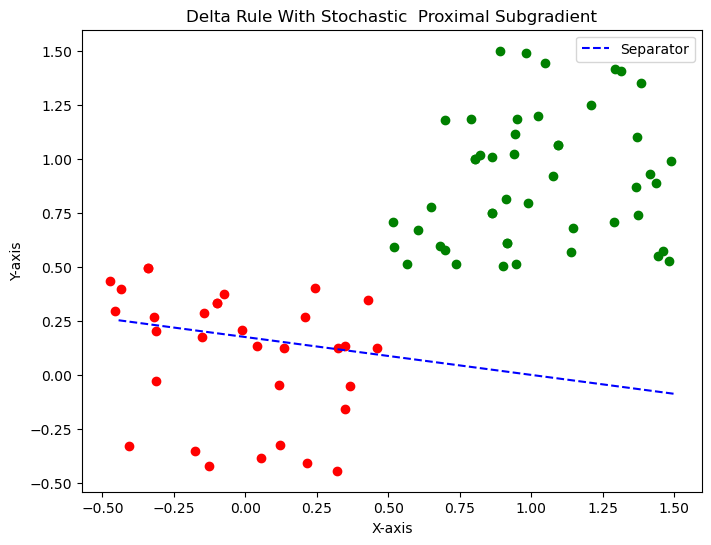

In [88]:
Plot_Avec_Separateur(W,X_test,y_test,'Delta Rule With Stochastic  Proximal Subgradient')